# -------------------------------------------------------
# Clustering

**Key Concepts:**
* Scatter Plots
* k-Means Clustering
* Elbow Method

In [98]:
# This is required to prevent warning from k-means in scikit-learn
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [99]:
import numpy as np
import pandas as pd

from IPython.display import display 

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer

# -------------------------------------------------------
# Load Data

In [100]:
df = pd.read_csv('../src/data/Mall_Customers.csv')

# -------------------------------------------------------
# Inspect Data

In [101]:
display(df.head())

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
# Drop the CustomerID column
df.drop(columns=['CustomerID'], inplace=True)
display(df.head())

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [103]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


None

In [104]:
# Encode the gender column, male = 0, female = 1
gender_map = {"Male": 0, "Female": 1}
df["GenderCode"] = df["Gender"].map(gender_map)
df.drop(columns=['Gender'], inplace=True)

# reorder the columns
df = df[['Age', 'GenderCode', 'Annual_Income', 'Spending_Score']]

display(df.head())

,Age,GenderCode,Annual_Income,Spending_Score
0,19,0,15,39
1,21,0,15,81
2,20,1,16,6
3,23,1,16,77
4,31,1,17,40


# -------------------------------------------------------
# EDA

## Histogram Plots

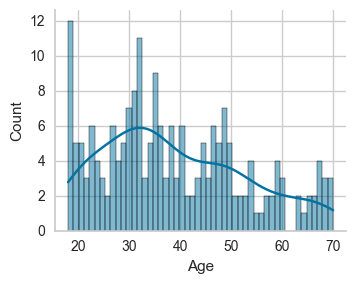

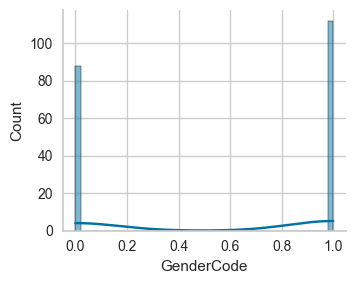

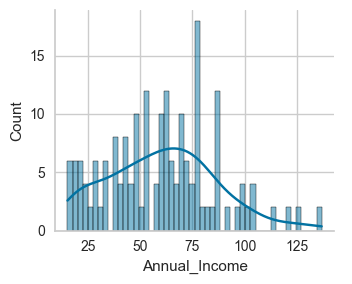

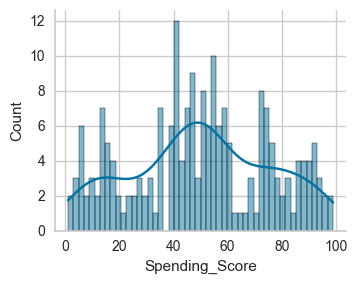

In [105]:
for x in df.columns:
    sns.FacetGrid(df, aspect=1.2).map(sns.histplot,x, bins=50, kde=True).add_legend()
    

## Scatter Plots

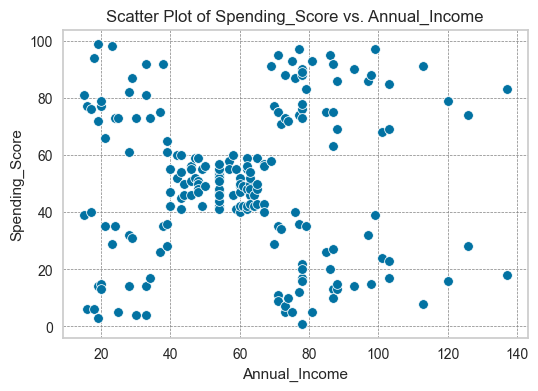

In [106]:
plt.figure(figsize=(6, 4))  #
sns.scatterplot(data=df, y="Spending_Score", x="Annual_Income")

# Add labels and title 
plt.ylabel("Spending_Score")
plt.xlabel("Annual_Income")
plt.title("Scatter Plot of Spending_Score vs. Annual_Income")

# Show the plot
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Add gridlines for better readability (optional)
plt.show()

## Determining Clusters

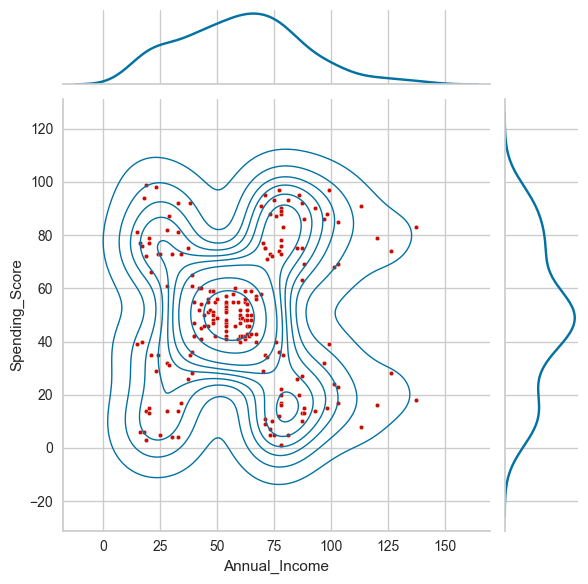

In [107]:
ax = sns.jointplot(data=df, x="Annual_Income", y="Spending_Score", kind="kde", levels=10, linewidths=1)
_ = sns.scatterplot(data=df, x="Annual_Income", y="Spending_Score", color = 'r', s=10)



## Elbow Curve

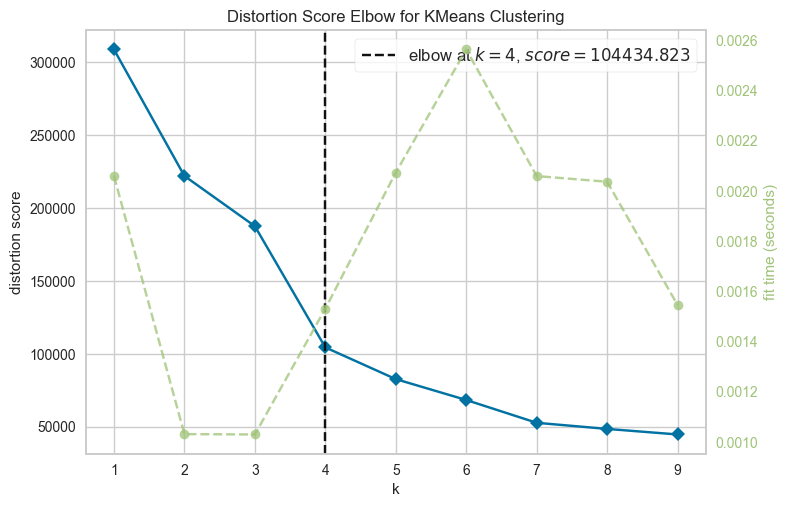

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [108]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

The elbow method indicates that there should be 4 clusters, confirming what we saw with the scatter plot.

# -------------------------------------------------------
# Model

In [109]:
k = 5
kmeans = KMeans(n_clusters=k)

clusters = kmeans.fit_predict(df)

df_clusters = df.copy()
df_clusters.insert(0,"Cluster", clusters)

# -------------------------------------------------------
# Evaluate

## Scatter Plot

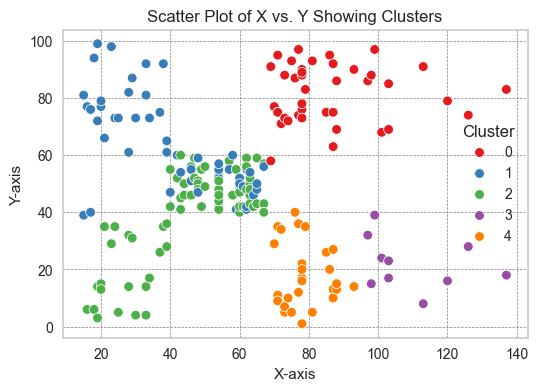

In [110]:
palette = sns.color_palette(palette='Set1')[0:k]

plt.figure(figsize=(6, 4))  #

sns.scatterplot(data=df_clusters, x="Annual_Income", y="Spending_Score", hue="Cluster", palette=palette)
sns.color_palette(palette='Set1')
# Add labels and title 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of X vs. Y Showing Clusters")

# Show the plot
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Add gridlines for better readability (optional)
plt.show()

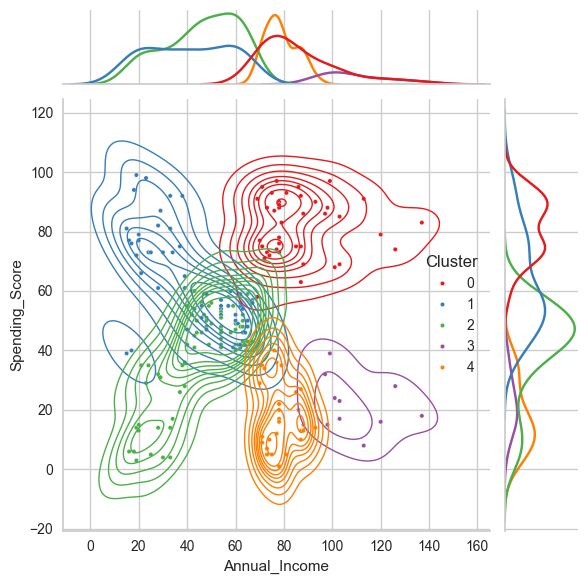

In [111]:
ax = sns.jointplot(data=df_clusters, x="Annual_Income", y="Spending_Score", kind="kde", hue = "Cluster", levels=10, linewidths=1, palette=palette)
_ = sns.scatterplot(data=df_clusters, x="Annual_Income", y="Spending_Score", hue = "Cluster", palette=palette, s=10)


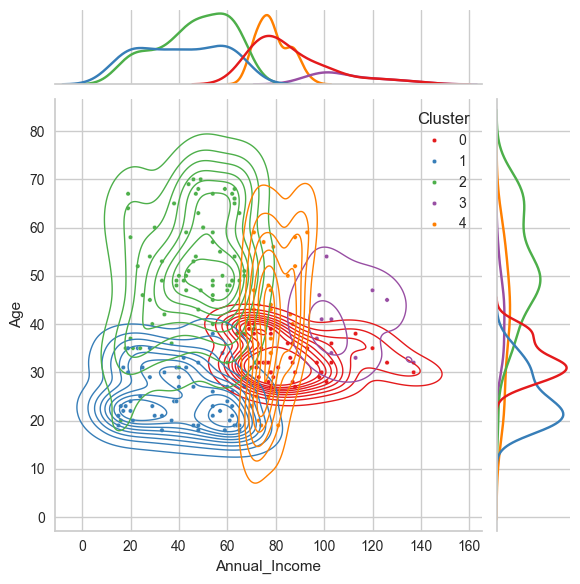

In [112]:
ax = sns.jointplot(data=df_clusters, x="Annual_Income", y="Age", kind="kde", hue = "Cluster", levels=10, linewidths=1, palette=palette)
_ = sns.scatterplot(data=df_clusters, x="Annual_Income", y="Age", hue = "Cluster", palette=palette, s=10)

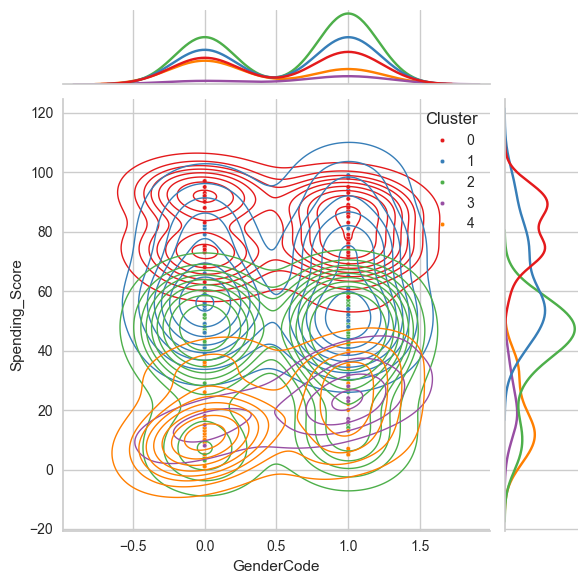

In [113]:
ax = sns.jointplot(data=df_clusters, x="GenderCode", y="Spending_Score", kind="kde", hue = "Cluster", levels=10, linewidths=1, palette=palette)
_ = sns.scatterplot(data=df_clusters, x="GenderCode", y="Spending_Score", hue = "Cluster", palette=palette, s=10)

## Statistical Analysis

In [114]:
for no in np.sort(df_clusters["Cluster"].unique()):
    data = df_clusters[df_clusters["Cluster"]==no].drop("Cluster", axis='columns')
    print(f'CLUSTER {no}:')
    print(f'{data.mean()}')
    print('\n')

CLUSTER 0:
Age               32.875
GenderCode         0.550
Annual_Income     86.100
Spending_Score    81.525
dtype: float64


CLUSTER 1:
Age               24.942308
GenderCode         0.576923
Annual_Income     40.750000
Spending_Score    63.019231
dtype: float64


CLUSTER 2:
Age               51.757143
GenderCode         0.600000
Annual_Income     46.328571
Spending_Score    39.914286
dtype: float64


CLUSTER 3:
Age                41.0
GenderCode          0.7
Annual_Income     109.7
Spending_Score     22.0
dtype: float64


CLUSTER 4:
Age               40.178571
GenderCode         0.392857
Annual_Income     78.892857
Spending_Score    17.428571
dtype: float64




In [115]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
GenderCode,200.0,0.56,0.497633,0.0,0.00,1.0,1.0,1.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [116]:
# Create a dictionary Clusters to Codes
cluster_map = {0: "High Income Middle Aged Men", 
               1: "High Income Youth Women", 
               2: "Middle Income Middle-Aged Women", 
               3: "Low Income Middle-Aged Women", 
               4: "Low Income Young Women", }

# Apply the map to create a new 'Cluster Label' column
df_clusters['Cluster Label'] = df_clusters['Cluster'].map(cluster_map)


display(df_clusters.head())

,Cluster,Age,GenderCode,Annual_Income,Spending_Score,Cluster Label
0,1,19,0,15,39,High Income Youth Women
1,1,21,0,15,81,High Income Youth Women
2,2,20,1,16,6,Middle Income Middle-Aged Women
3,1,23,1,16,77,High Income Youth Women
4,1,31,1,17,40,High Income Youth Women


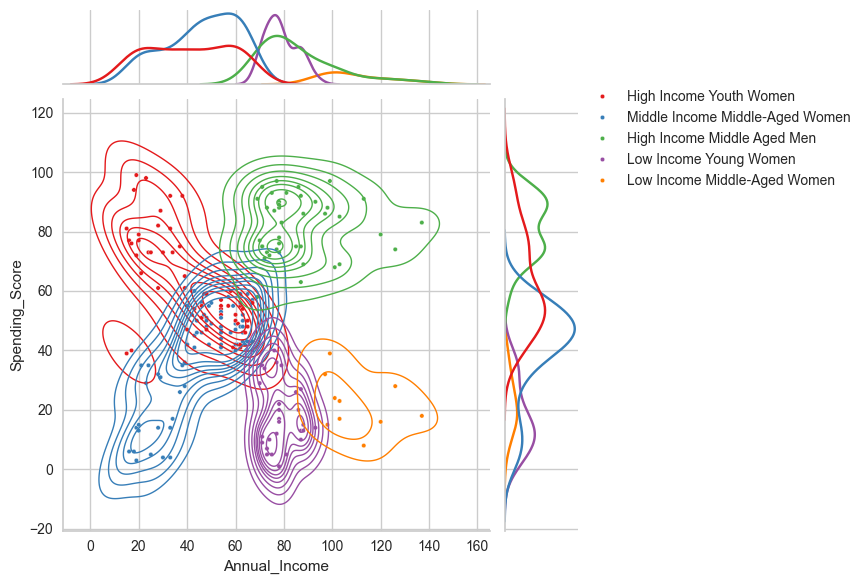

In [117]:
g = sns.jointplot(data=df_clusters, 
                  x="Annual_Income", 
                  y="Spending_Score", 
                  kind="kde", 
                  hue = "Cluster Label", 
                  levels=10, linewidths=1, palette=palette)

_ = sns.scatterplot(data=df_clusters, 
                    x="Annual_Income", 
                    y="Spending_Score", 
                    hue = "Cluster Label", 
                    palette=palette, s=10)
plt.legend(bbox_to_anchor=(1.2, 1.05))
plt.show()

In [118]:
g.ax_joint.legend

<bound method Axes.legend of <Axes: xlabel='Annual_Income', ylabel='Spending_Score'>>